In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as la

1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

(3, 1000)


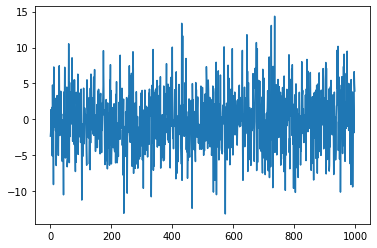

In [37]:
N=1000
x1= np.random.normal(0,1,N).T
x2=x1+np.random.normal(0,3,N).T
x3=2*x1+x2
plt.plot(x3)
# print(x1)

ds= np.array([x1,x2,x3])
# x = np.vstack((x1, x2, x3))

print(x.shape)


In [47]:
cov= np.cov(ds)

#EigenVector and Decomposition
# print("A:\n", cov, '\n')

l, V = la.eig(cov)
# the eigenvalues
print("The Eigen values:\n", l, '\n')
# print("real(l):\n", np.real_if_close(l), '\n')
# V is the matrix of the eigenvectors
print("The Eigen vectors are:\n", V, '\n')


The Eigen values:
 [ 2.60340187e+01+0.j -1.38881533e-15+0.j  1.98514806e+00+0.j] 

The Eigen vectors are:
 [[-0.12053078 -0.81649658  0.56462879]
 [-0.57099543 -0.40824829 -0.71224824]
 [-0.81205699  0.40824829  0.41700933]] 



In [54]:
# Eigen values and vector using SVD


# perform the SVD
U, S, Vt = la.svd(cov)

# print("shapes: U =", U.shape, "D:", S.shape, "V^T:", Vt.shape, '\n')
print("Spectrum (Eigen values):\n", S, '\n')
# print("U:\n", U, '\n')
print("V^T:\n", Vt, '\n')
# print(ds)

print("\nAnswer : The both procedure produces almost same result but there is minor variance that can be negligible")

Spectrum (Eigen values):
 [2.60340187e+01 1.98514806e+00 1.13187300e-15] 

V^T:
 [[-0.12053078 -0.57099543 -0.81205699]
 [ 0.56462879 -0.71224824  0.41700933]
 [ 0.81649658  0.40824829 -0.40824829]] 


Answer : The both procedure produces almost same result but there is minor variance that can be negligible


In [66]:
#########
Lambda = np.diag(l)
print('Percentage variability of All components:\n',
       (np.sum(l/Lambda.trace())*100))

print('\nPercentage variability of component 1 and 3:\n', (np.sum(l[[0,2]])/Lambda.trace())*100)


Percentage variability of All components:
 (99.99999999999997+0j)

Percentage variability of component 1 and 3:
 (99.99999999999999+0j)


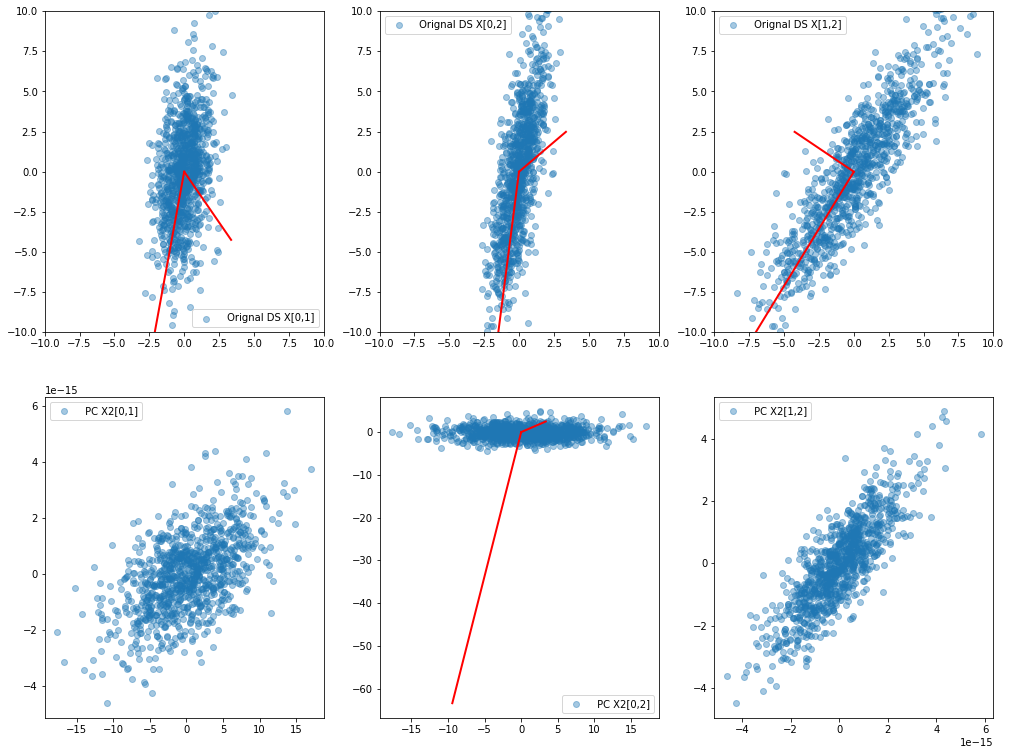

In [127]:
# redifing the data set

# l01, V01 = np.linalg.eig(np.dot(dataset[0:2,:], dataset[0:2,:].T)/(N-1))
# Xp01 = np.dot(V01.T, dataset[0:2,:])


# l02, V02 = np.linalg.eig(np.dot(dataset[0:3:2,:], dataset[0:3:2,:].T)/(N-1))
# Xp02 = np.dot(V02.T, dataset[0:3:2,:])


# l12, V12 = np.linalg.eig(np.dot(dataset[1:3,:], dataset[1:3,:].T)/(N-1))
# Xp12 = np.dot(V12.T, dataset[1:3,:])



nds = np.dot(V.T, ds)
# print(nds)

# ploting data set


scale_factor=3


fig , axs = plt.subplots(nrows=2, ncols=3 , figsize=(17,13)) 

axs[0,0].scatter(ds[0,:], ds[1,:], alpha=0.4, label=(" Orignal DS X[0,1]"))
axs[0,0].legend()

for li, vi in zip(l, V.T):
#     print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    axs[0,0].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)

axs[0,0].axis([-10,10,-10,10]);




axs[0,1].scatter(ds[0,:], ds[2,:], alpha=0.4, label=(" Orignal DS X[0,2]"))
axs[0,1].legend()
for li, vi in zip(l, V.T):
#     print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    axs[0,1].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)

axs[0,1].axis([-10,10,-10,10]);



axs[0,2].scatter(ds[1,:], ds[2,:], alpha=0.4, label=(" Orignal DS X[1,2]"))
axs[0,2].legend()
for li, vi in zip(l, V.T):
#     print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    axs[0,2].plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)

axs[0,2].axis([-10,10,-10,10]);



## PC 
axs[1,0].scatter(nds[0,:], nds[1,:], alpha=0.4, label=(" PC X2[0,1]"))
axs[1,0].legend()


# for li, vi in zip(l, V.T):
# #     print("Eigenvalue:", li, ",\teigenvector:", vi)
#     # the line is defined by specifying its beginning and its end 
#     axs[1,0].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)





axs[1,1].scatter(nds[0,:], nds[2,:], alpha=0.4, label=(" PC X2[0,2]"))
axs[1,1].legend()
for li, vi in zip(l, V.T):
#     print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    axs[1,1].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)




axs[1,2].scatter(nds[1,:], nds[2,:], alpha=0.4, label=(" PC X2[1,2]"))
# axs[1,2].axis([-4,4,-4,4]);

axs[1,2].legend()

# for li, vi in zip(l, V.T):
# #     print("Eigenvalue:", li, ",\teigenvector:", vi)
#     # the line is defined by specifying its beginning and its end 
#     axs[1,2].plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)





2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

With Eigen-decomposition:
Eigenvalues:
 [2.60213079e+01 3.83250806e-03 2.00006053e+00]
Eigenvectors:
 [[-0.12055984 -0.81716483  0.563655  ]
 [-0.57038478 -0.4076923  -0.71305553]
 [-0.81248171  0.4074661   0.41694707]]

With SVD:
Eigenvalues:
 [2.60570036e+01 2.00162410e+00 3.83348480e-03]
Eigenvectors:
 [[-0.12074087  0.56363349 -0.81715294]
 [-0.57016607 -0.71322478 -0.40770217]
 [-0.81260833  0.41668657  0.40748008]]

Percentage variability gained by the three components:
 [9.28496747e+01 1.36752206e-02 7.13665010e+00]

Percentage variability of the reduced system considering only the principal component 1 and 3:
 99.98632477935641


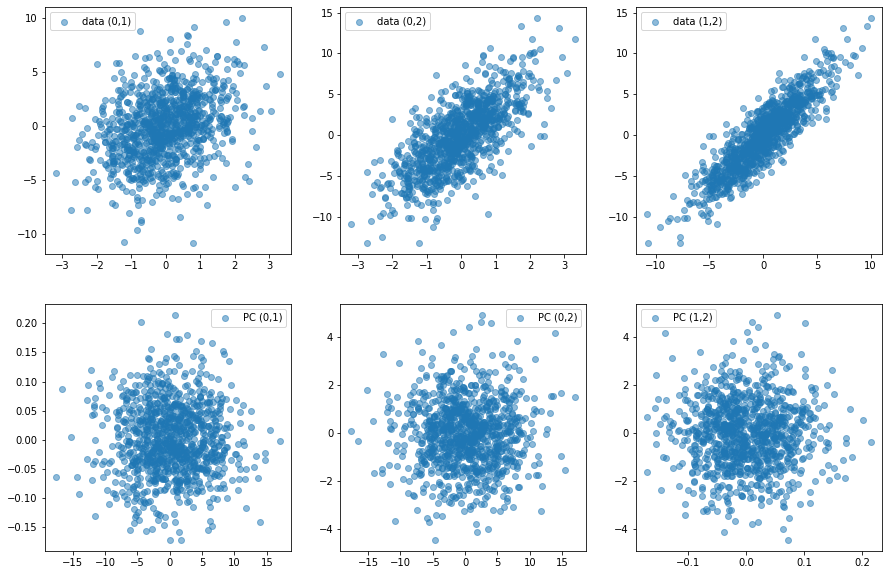

In [208]:
noise= np.random.normal(loc=0 , scale=1/50 , size=(3,N, 10))
# print(s)

ds_noise = ds+np.sum(noise, axis=2)
# print(ds_noise)
# print(ds)


# Reducing The dimensions

cov1 = np.cov(ds_noise)
l1, V1 = np.linalg.eig(cov1)
l1 = np.real_if_close(l1)
U1, S1, Vt1 = la.svd(ds_noise)
l_svd1 = S1**2/(N-1)
V_svd1 = U1




print('With Eigen-decomposition:\nEigenvalues:\n',l1)
print('Eigenvectors:\n', V1)
print('\nWith SVD:\nEigenvalues:\n',l_svd1)
print('Eigenvectors:\n', V_svd1)






Lambda = np.diag(l1)
print('\nPercentage variability gained by the three components:\n',
       (l1/Lambda.trace())*100)

print('\nPercentage variability of the reduced system considering only the principal component 1 and 3:\n', (np.sum(l1[[0,2]])/Lambda.trace())*100)

# plotting profile plots of x in the new coordinates
x_new1 = np.dot(V1.T,ds_noise)


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axs[0,0].scatter(ds_noise[0,:],ds_noise[1,:], alpha=0.5, label='data (0,1)')
axs[0,0].legend()
axs[0,1].scatter(ds_noise[0,:],ds_noise[2,:], alpha=0.5, label='data (0,2)')
axs[0,1].legend()
axs[0,2].scatter(ds_noise[1,:],ds_noise[2,:], alpha=0.5, label='data (1,2)')
axs[0,2].legend()
axs[1,0].scatter(x_new1[0,:],x_new1[1,:], alpha=0.5, label='PC (0,1)')
#axs[1,0].set_ylim(-10,10)
axs[1,0].legend()
axs[1,1].scatter(x_new1[0,:],x_new1[2,:], alpha=0.5, label='PC (0,2)')
axs[1,1].legend()
axs[1,2].scatter(x_new1[1,:],x_new1[2,:], alpha=0.5, label='PC (1,2)')
#axs[1,2].set_xlim(-5,5)
axs[1,2].legend()

plt.show()







3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [224]:
df = pd.read_csv('data/magic04.data', names=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','fCategory'])
df1 = df.iloc[0:len(df),0:-1]
df


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,fCategory
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [222]:
# U2, S2, Vt2 = la.svd(df1)
# l_svd2 = S2**2/(len(df1)-1)
# V_svd2 = U2

print(l_svd2)
print('\nWith SVD:\nEigenvalues:\n',l_svd2)

(10,)

With SVD:
Eigenvalues:
 [4.77409403e+04 4.19856128e+03 2.08452610e+03 1.33861305e+03
 8.21439948e+02 4.33666972e+02 1.17362222e+02 5.64110552e-01
 3.48553824e-02 4.22636373e-04]


In [213]:
l2, V2 = la.eig(np.cov(df1,rowvar=False))
print('\nWith Eigen-decomposition:\nEigenvalues:\n',l2)


With Eigen-decomposition:
Eigenvalues:
 [6.57979140e+03+0.j 3.85387048e+03+0.j 2.01638313e+03+0.j
 1.32675968e+03+0.j 6.10187259e+02+0.j 4.33599171e+02+0.j
 1.17330074e+02+0.j 8.63965822e-02+0.j 1.07363851e-02+0.j
 3.85322859e-04+0.j]


In [214]:
Lambda = np.diag(l_svd2)
print('\nPercentage variability gained by the components:\n',
       (l_svd2/Lambda.trace())*100)


Percentage variability gained by the components:
 [8.41461946e+01 7.40020938e+00 3.67409895e+00 2.35938365e+00
 1.44783587e+00 7.64363357e-01 2.06857769e-01 9.94277783e-04
 6.14346465e-05 7.44921283e-07]


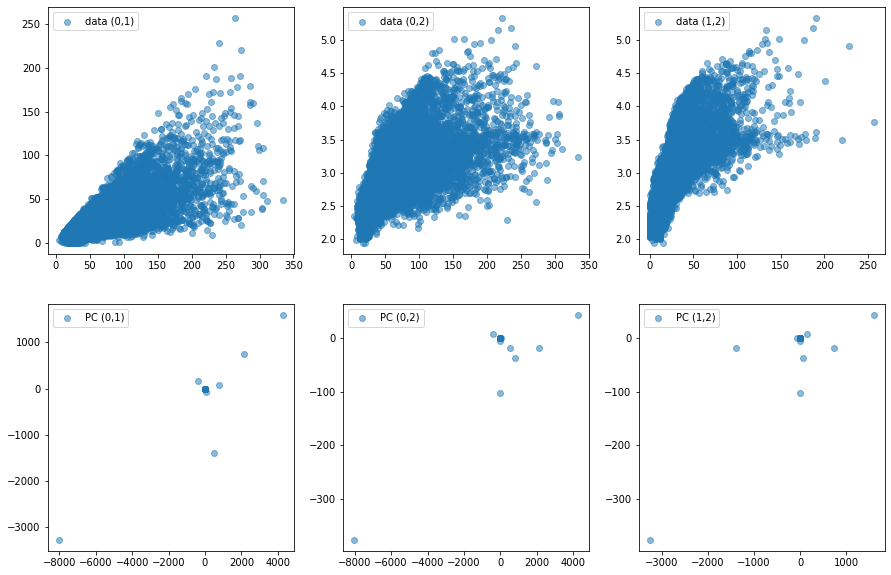

In [225]:
pcaData = np.dot(U2.T, df1)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs[0,0].scatter(df1.values[:,0], df1.values[:,1], alpha=0.5, label='data (0,1)')
axs[0,0].legend()
axs[0,1].scatter(df1.values[:,0], df1.values[:,2], alpha=0.5,label='data (0,2)')
axs[0,1].legend()
axs[0,2].scatter(df1.values[:,1], df1.values[:,2], alpha=0.5,label='data (1,2)')
axs[0,2].legend()
axs[1,0].scatter(pcaData[:,0], pcaData[:,1], alpha=0.5, label='PC (0,1)')
axs[1,0].legend()
axs[1,1].scatter(pcaData[:,0], pcaData[:,2], alpha=0.5,label='PC (0,2)')
axs[1,1].legend()
axs[1,2].scatter(pcaData[:,1], pcaData[:,2], alpha=0.5,label='PC (1,2)')
axs[1,2].legend()

plt.show()